# **Alumino relaciones de Kramers-Kronig**

En este notebook utilice los valores teoricos de las relaciones de Kramers-Kronig que los consegui en https://refractiveindex.info/?shelf=main&book=Al&page=Rakic

Empece por organizar los datos y luego realice la comparación entre el valor teorico y el valor experimental de nuestra muestra.


In [1]:
import pandas as pd

# Cargar el archivo y examinar las primeras filas para entender su estructura
file_path = 'Rakic.csv'
data = pd.read_csv(file_path)

# Ver las primeras filas para inspeccionar las columnas y su estructura
data.head()


,wl,n
0,1.2399E-04,9.999946E-01
1,1.3051E-04,9.99994E-01
2,1.3776E-04,9.99993E-01
3,1.5498E-04,9.99991E-01
4,1.7712E-04,9.99989E-01


In [2]:
# Separar las filas hasta la fila 209 y luego agregar los valores de k a partir de esa fila
# Se inicia el procesamiento de las filas a partir de la fila 209 (índice 208 en Python)

# Cargar la columna `k` desde la fila 209 en adelante
k_data = data.loc[207:, 'n'].reset_index(drop=True)
k_data.name = 'k'  # Renombrar la serie para `k`

# Seleccionar las columnas `wl` y `n` y resetear el índice
wavelength_n_data = data[['wl', 'n']].iloc[:207].reset_index(drop=True)

# Concatenar las dos secciones en un nuevo DataFrame que contenga `wavelength`, `n`, y `k`
result_data = pd.concat([wavelength_n_data, k_data], axis=1)
result_data.columns = ['wavelength', 'n', 'k']  # Renombrar las columnas

# Mostrar el resultado procesado
result_data.head(10)


,wavelength,n,k
0,1.2399E-04,9.999946E-01,8.2410E-08
1,1.3051E-04,9.99994E-01,1.2720E-07
2,1.3776E-04,9.99993E-01,1.2488E-07
3,1.5498E-04,9.99991E-01,1.9173E-07
4,1.7712E-04,9.99989E-01,3.1463E-07
5,2.0664E-04,9.99984E-01,5.5102E-07
6,2.4797E-04,9.9998E-01,1.0726E-06
7,3.0996E-04,9.9997E-01,2.4843E-06
8,3.5424E-04,9.9995E-01,4.0484E-06
9,4.1328E-04,9.9994E-01,7.1408E-06


In [3]:
# Guardar el DataFrame `result_data` en un archivo CSV llamado "processed_data.csv"
output_path = 'al.csv'
result_data.to_csv(output_path, index=False)

output_path


'al.csv'

In [49]:
import pandas as pd

# Cargar el archivo ya procesado
file_path = 'al.csv'
data2 = pd.read_csv(file_path, sep=',')

# Convertir la columna 'wavelength' de µm a nm

# Convertir la columna 'wavelength' de µm a nm
data2['wavelength'] = data2['wavelength'] * 1000

# Guardar el archivo actualizado en formato .txt separado por espacios
output_path = 'Rakic_processed_nm.txt'
data2.to_csv(output_path, sep='\t', index=False)

In [50]:
#Cargamos las librerias necesarias
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from scipy.signal import medfilt

/tmp/ipykernel_200672/2307013410.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('dark.txt', sep=';',skiprows=14, skipfooter=1)
/tmp/ipykernel_200672/2307013410.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('reference.txt', sep=';',skiprows=14, skipfooter=1)
/tmp/ipykernel_200672/2307013410.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('dark.txt', sep=';',skiprows=14, skipfooter=1)
/tmp/ipykernel_200672/2307013410.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='pyt

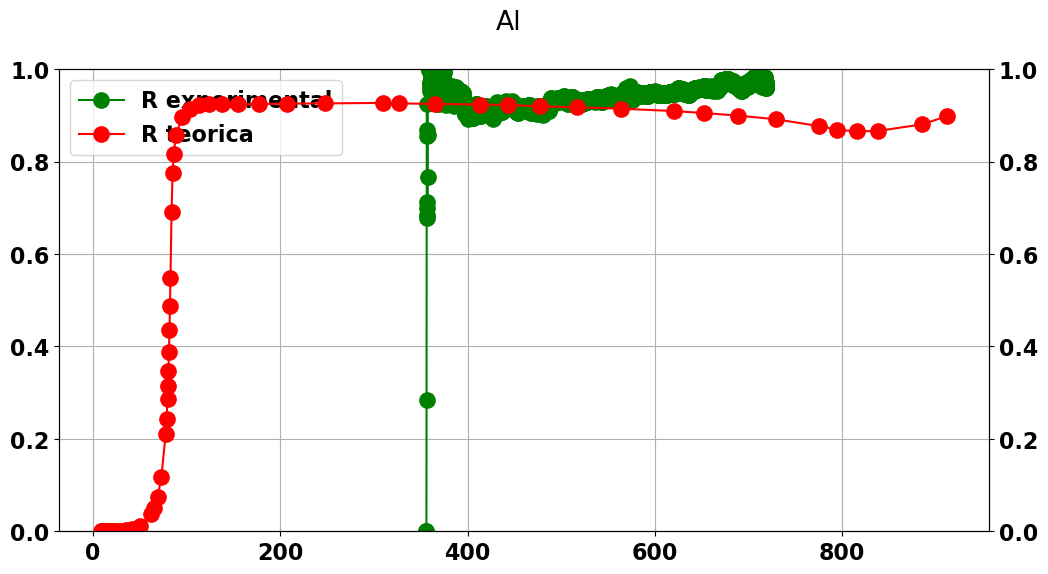

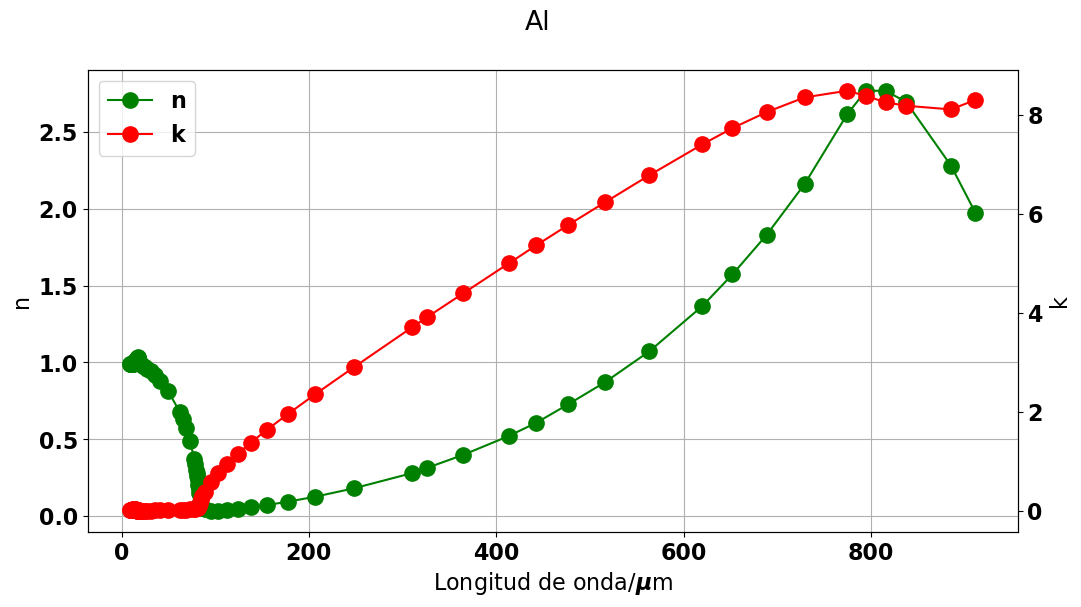

In [57]:
#Usamos pandas para cargar los espectros tomados con el Ocean Optics 2000
#lim y lim2 nos permite acotar el rango del espectro a tomar. Las longuitudes de onda donde la señal de referencia es muy baja deben despreciarse, ya tendran un gran error en la reflectancia.
lim=300
lim2=200
#Window size determina un tamaño de filtro para suavizar el espectro. Debe ser un valor par.
Window_size=201
#Se carga la señal oscura de la referencia
f = pd.read_csv ('dark.txt', sep=';',skiprows=14, skipfooter=1)
Ir = np.array(f)[lim:-lim2,1]
wld = np.array(f)[lim:-lim2,0]
#Se carga la señal de la referencia
f = pd.read_csv ('reference.txt', sep=';',skiprows=14, skipfooter=1)
Is = np.array(f)[lim:-lim2,1]
#Se carga la señal oscura de la muestra
f = pd.read_csv ('dark.txt', sep=';',skiprows=14, skipfooter=1)
Ir1 = np.array(f)[lim:-lim2,1]
#Se carga la señal de la muestra
f = pd.read_csv ('aluminio2.txt', sep=';',skiprows=14, skipfooter=1)
Is1 = np.array(f)[lim:-lim2,1]
Is1=Is1
Is=Is
#Aqui se filtra el espectro y la referencia
Is1=medfilt(medfilt(Is1,kernel_size=Window_size))
Is=medfilt(medfilt(Is,kernel_size=Window_size))
#Se calcula la reflectancia y grafica
R1=Is1/Is



#Cargamos un archivo con los valores de n y k teoricos para el Si
col_names=['Longitud de onda (nm)', 'n','k']
f = pd.read_csv (r'./Rakic_processed_nm.txt', sep='\t',skiprows=1,names=col_names)
f=np.array(f[50:-50])

#Se calcula la reflectancia teorica a partir de los valores de n y k
R=((f[:,1]-1)**2+f[:,2]**2)/((f[:,1]+1)**2+f[:,2]**2)
#Graficamos
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Al')
ax1 = plt.subplot()
plt.ylim(0,1)

lns1 = ax1.plot(wld,R1,marker='o',color='green',markersize=11,label='R experimental')
plt.grid()
ax2 = ax1.twinx()

lns2 = ax2.plot(f[:,0],R,color='red',marker='o',markersize=11,label='R teorica')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.ylim(0,1)

font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Al')

ax1 = plt.subplot()
lns1 = ax1.plot(f[:,0],f[:,1],marker='o',color='green',markersize=11,label='n')
plt.ylabel('n')
plt.xlabel(r'Longitud de onda/$\mu$m')
#ax1.legend()
plt.grid()

ax2 = ax1.twinx()
lns2 = ax2.plot(f[:,0],f[:,2],color='red',marker='o',markersize=11,label='k')
plt.ylabel('k')


# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

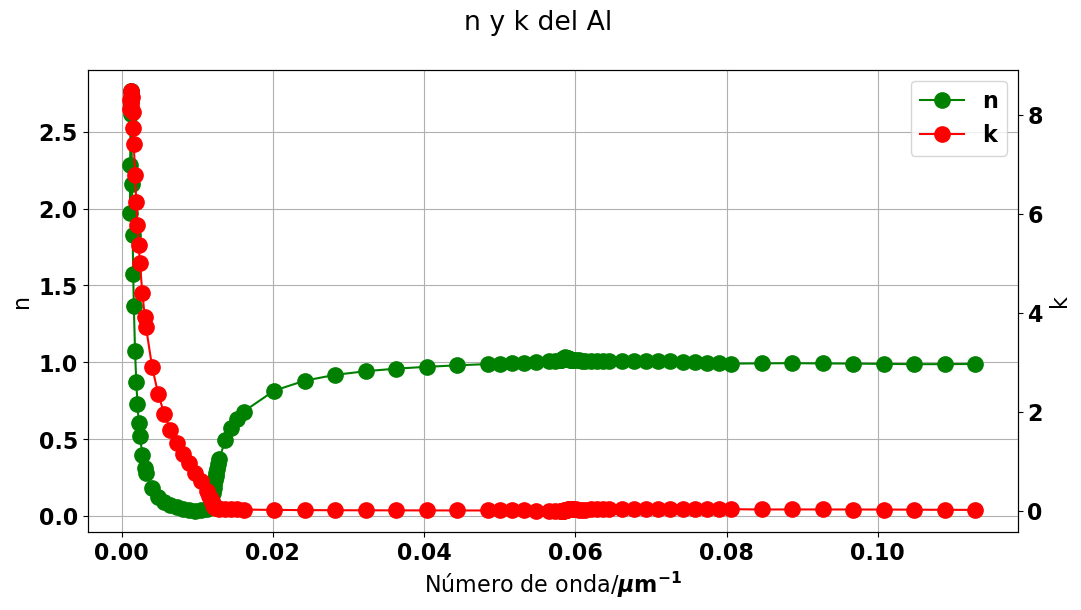

In [58]:
#Usamos el algoritmo de Ohta con el metodo de McLaurin para hallar k en funcion del n teorico y comparar con el k teorico.
#La relacion de Kramer-Konig en este caso se escribe en terminos del numero de onda. Primero graficaremos n y k teorico en funcion del numero de onda
wl = f[:,0]
wn2 = 1/wl[::-1]
k_interp = f[:,2][::-1]
n_interp = f[:,1][::-1]
fig = plt.figure(figsize=(12,6))
fig.suptitle('n y k del Al')


ax1 = plt.subplot()
lns1 = ax1.plot(wn2,n_interp,marker='o',color='green',markersize=11,label='n')
plt.ylabel('n')
plt.xlabel(r'Número de onda/$\mu \mathbf{m}^{-1}$')
#ax1.legend()
plt.grid()

ax2 = ax1.twinx()
lns2 = ax2.plot(wn2,k_interp,color='red',marker='o',markersize=11,label='k')
plt.ylabel('k')



# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

Frecuencia falor conocido =  0.1 um^-1


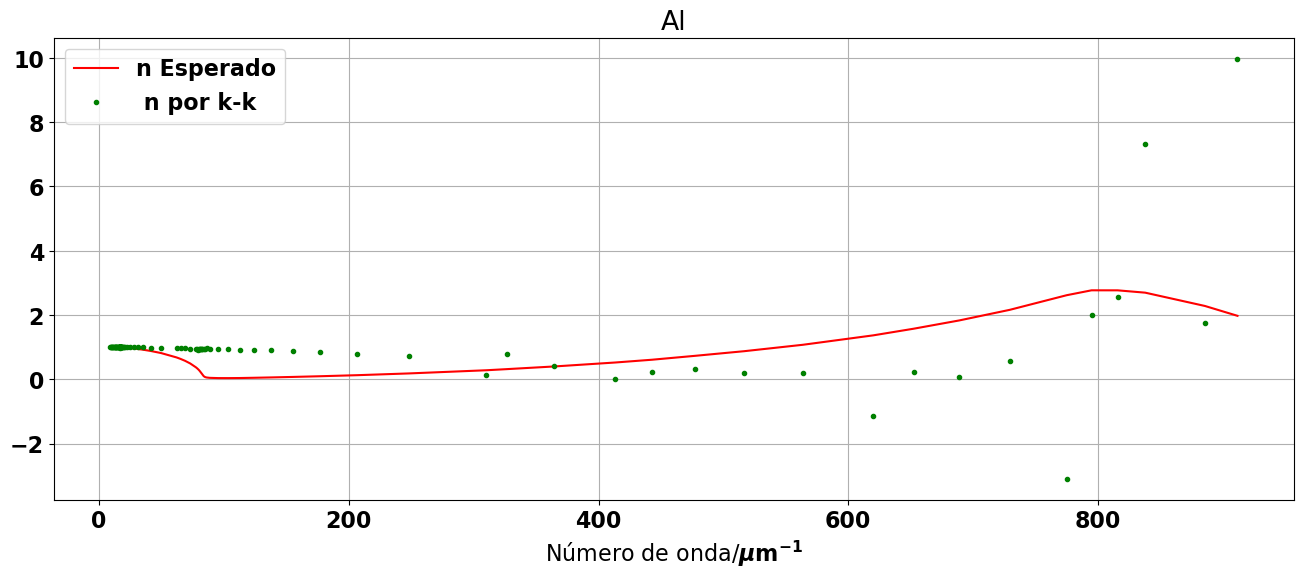

In [59]:
# método Mc Claurin
dn = np.zeros(len(wn2))
h = wn2[1]-wn2[0]
for ii in range(len(wn2)):
  if(ii % 2 == 0 ):
    f = 0
    for jj in range(1,len(wn2),2):
      f = f + wn2[jj]*k_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2),2):
      f = f + wn2[jj]*k_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)

  dn[ii] = 2*2*h/np.pi*f
  n_kk = dn + (n_interp[int(len(wn2)/2)] - dn[int(len(wn2)/2)]) # Aquí se introduce el valor conocido, asegurando que la diferencia entre el valor encontrado y el conocido sea cero.

val_c = wn2[int(len(wn2)/2)]
print('Frecuencia falor conocido =  %.1f um^-1'%val_c)

plt.figure(figsize=(16,6))
plt.title('Al')
plt.plot(wl,n_interp[::-1],'r-',label='n Esperado')
plt.plot(wl,n_kk[::-1],'g.',label=' n por k-k')
plt.xlabel(r'Número de onda/$\mu \mathbf{m}^{-1}$')
plt.legend()
plt.grid()
plt.show()

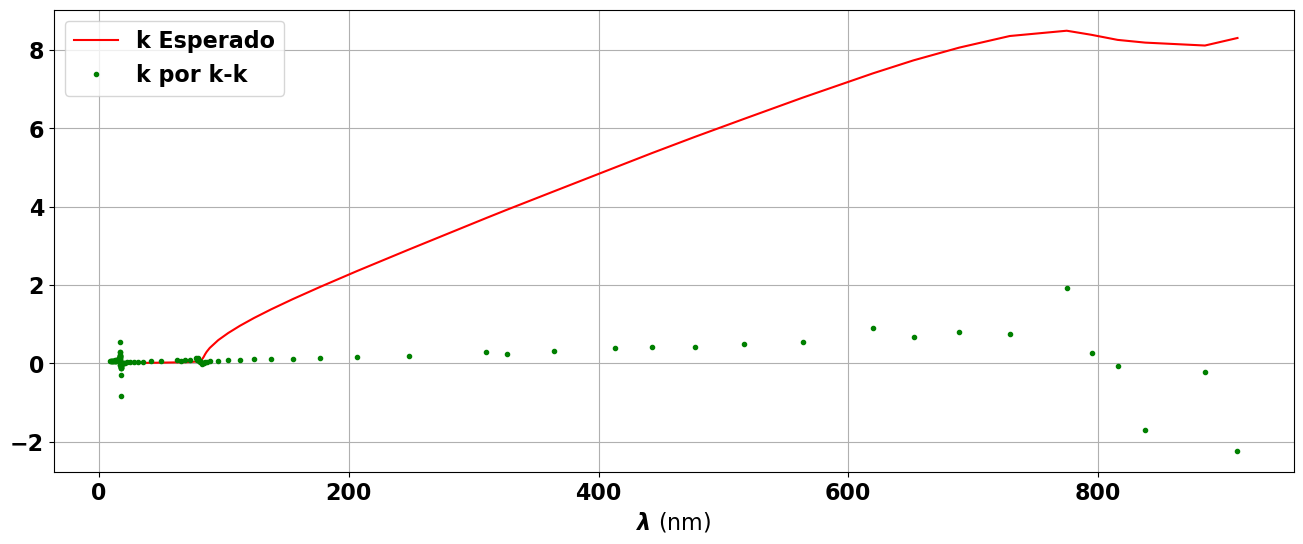

In [60]:
# Ahora calcularemos k a partir del n teorico usando Kramer-Konig.
dn = np.zeros(len(wn2))
h = wn2[1]-wn2[0]
for ii in range(len(wn2)):
  if(ii % 2 == 0 ):
    f = 0
    for jj in range(1,len(wn2),2):
      f = f + wn2[ii]*n_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2),2):
      f = f + wn2[ii]*n_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)

  dn[ii] = 2*2*h/np.pi*f
  k_kk = -dn + (k_interp[int(len(wn2)/2)] + dn[int(len(wn2)/2)])

plt.figure(figsize=(16,6))
plt.plot(wl,k_interp[::-1],'r-',label='k Esperado')
plt.plot(wl,k_kk[::-1],'g.',label='k por k-k')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_200672/3347747367.py:4: RuntimeWarning: divide by zero encountered in log
  lnr=np.log(R2)/2
/tmp/ipykernel_200672/3347747367.py:21: RuntimeWarning: invalid value encountered in cos
  nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
/tmp/ipykernel_200672/3347747367.py:22: RuntimeWarning: invalid value encountered in sin
  kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))
/tmp/ipykernel_200672/3347747367.py:22: RuntimeWarning: invalid value encountered in cos
  kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))


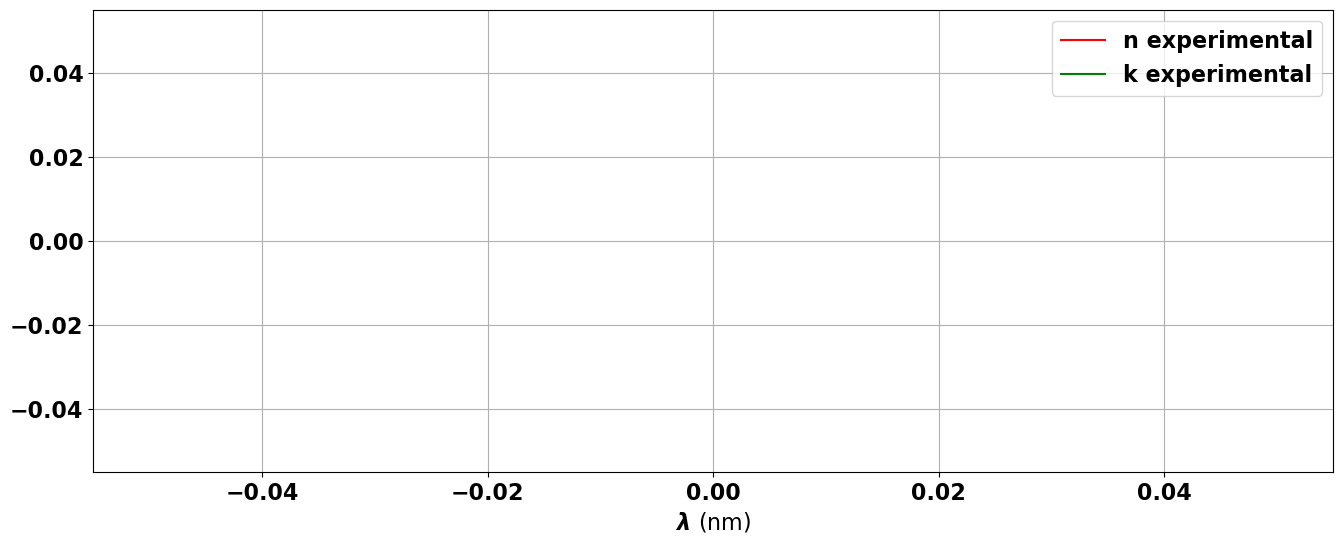

In [61]:
#Finalmente, calculamos la fase del coeficiente de reflexion a partir de la reflectancia
wn2d = 1/wld[::-1]
R2=R1
lnr=np.log(R2)/2
# método Mc Claurin
dn = np.zeros(len(wn2d))
h = wn2d[1]-wn2d[0]
for ii in range(len(wn2d)):
  if(ii % 2 == 0 ):
    f = 0
    for jj in range(1,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)

  dn[ii] = 2*2*h/np.pi*f
  phaser = -dn

nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))

plt.figure(figsize=(16,6))
plt.plot(wld,nn,'r-',label='n experimental')
plt.plot(wld,kk,'g-',label='k experimental')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()